<a href="https://colab.research.google.com/github/min02choi/Machine-Learning/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster
## Predict survival on the Titanic

## 1. Defining the problem statement

In [1]:
from IPython.display import Image
# Image("images/titanic-disaster.jpg")

## 2. Collecting the data

In [2]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

코랩에서 파일 올려서 할 경우애는 런타임이 끊기면 파일이 삭제되므로 할 때마다 파일을 업로드 해야 함

## 3. Exploratory data analysis

In [3]:
# 데이터 확인
train.head()    # 인자에 숫자 없는 경우 기본적으로 5개의 항목만 보여줌

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
* Survived: 0 = No, 1 = Yes
* Pclass: 1 = 1st, 2 = 2nd, 3 = 3rd
* SibSp: # of siblings / spouses abord the Titanic
* Parch(Parent + Children): # of parents / children abord the Titanic
* Fare: Ticket cost
* Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Survived 항목이 없음. 우리는 train set에서 학습한 모델을 바탕으로 test set 사람들의 생존 여부를 파악해야 함

In [5]:
# 데이터 모양 확인
train.shape

(891, 12)

891명의 passenger 정보, 12개의 feature 정보

In [6]:
test.shape

(418, 11)

In [7]:
# 각 feature의 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


몇 개의 정보가 빠져(유실되어)있음(NaN)(5, 10, 11번 항목).
* 잘못된 결과가 나올 수 있음. 그러므로 feature engineering 작업을 통해 이 값을 평균값을 덯거나, 제외하고 분석하거나 등의 전처리 작업이 필요함.

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# 다른 방법으로 null인 항목 찾아내기(pandas)
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# seaborn을 통해 시각화하기
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()     # setting seaborn default for plots

In [12]:
# 살았는지 죽었는지 두 개의 bar chart를 표시
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived, dead])
  df.index = ['Survived', 'Dead']
  df.plot(kind='bar', stacked=True, figsize=(10, 5))

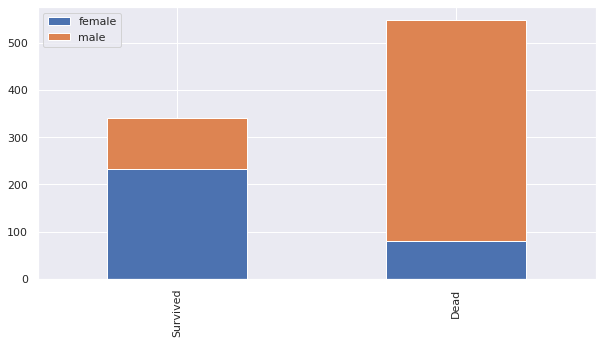

In [13]:
bar_chart('Sex')

가설: 여자는 남자보다 많이 살아남았음

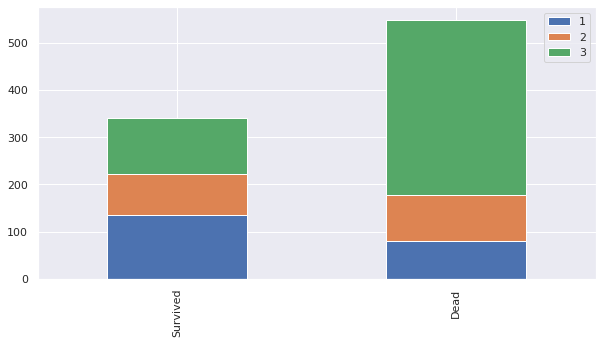

In [14]:
bar_chart('Pclass')

가설: 1등급 좌석에 앉은 사람이 더 많이 살아남았음

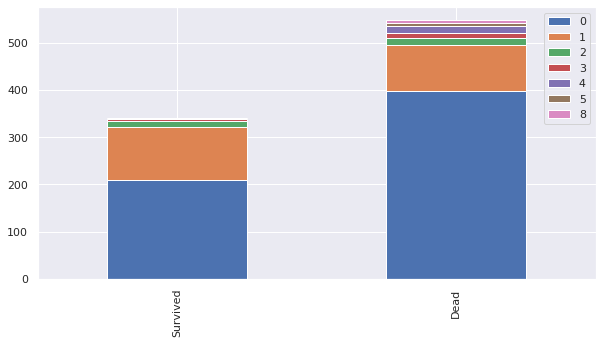

In [15]:
bar_chart('SibSp')

가설: 가족이랑 같이 간 경우에 더 많이 살아남았음

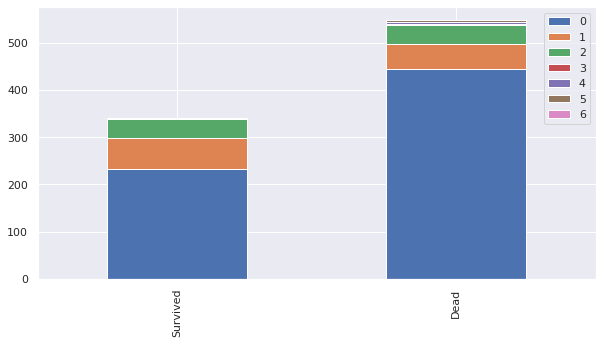

In [16]:
bar_chart('Parch')

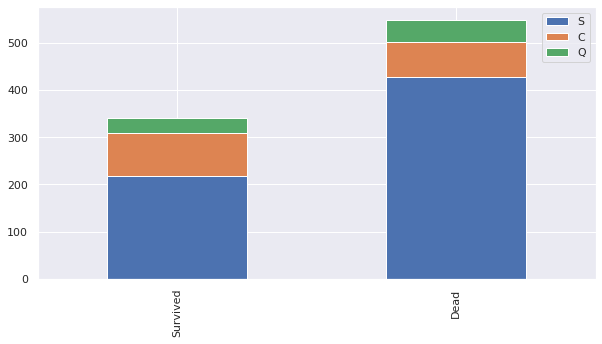

In [17]:
bar_chart('Embarked')

## 4. Feature Engineering
* feature -> column
* feature를 feature 벡터로 만들어야 함
* Sex의 값을 숫자로 변경시키기 (기계에게는 숫자가 더 편함)
* NaN의 값을 유의미한 숫자로 넣어줌

### 4.2 Name

In [18]:
train_test_data = [train, test]     # train과 test set 를 합침

for dataset in train_test_data:
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [20]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [21]:
title_mapping = {
    "Mr": 0, "Miss": 1, "Mrs": 2, 
    "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3,
    "Mlle": 3, "Countess": 3, "Capt": 3, "Ms": 3, "Sir": 3, 
    "Lady": 3, "Mme": 3, "Don": 3, "Jonkheer": 3
}

for dataset in train_test_data:
  dataset['Title'] = dataset['Title'].map(title_mapping)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


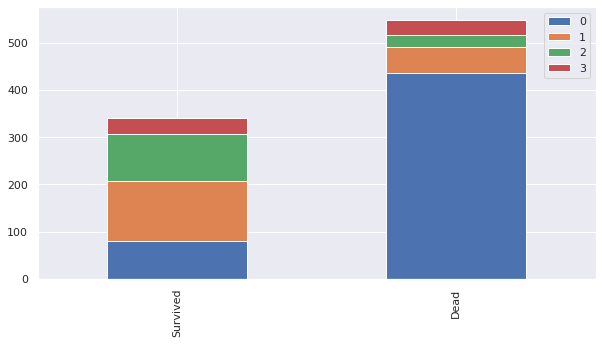

In [23]:
bar_chart('Title')

In [24]:
# dataset에서 Name 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


### 4.3 Sex

In [26]:
sex_mapping = {"male": 0, "female": 1}

for dataset in train_test_data:
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)

### 4.4 Age(1) - Missing Age
무작정 NaN을 평균 나이값으로 채우는게 아닌 결혼여부를 따져 과학적으로 삽입

In [27]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

-> age가 null인 경우(fillna)에는 각 Title별로(train.groupby('Title')) Age의 평균(median) 을 사용하라
* fillna(): Fill NA/NaN values using the specified method

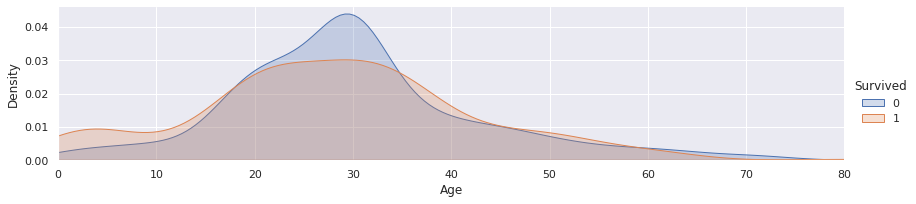

In [28]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

(30.0, 40.0)

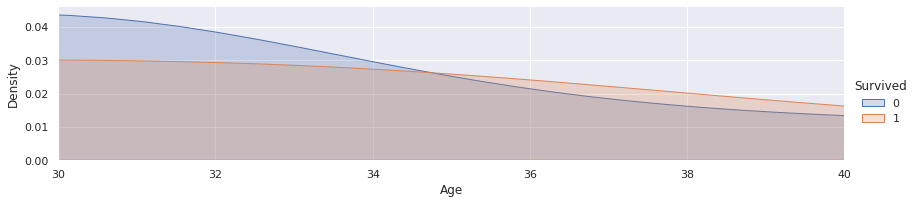

In [29]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(30, 40)      # 30~40 연령 확인

In [30]:
# 나이를 구간별로 새로운 인덱스로 설정
for dataset in train_test_data:
  dataset.loc[(dataset['Age'] <= 16), 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
  dataset.loc[(dataset['Age'] > 62), 'Age'] = 4

loc: dataframe 데이터 조회
* SQL의 WHERE문과 비슷한 역할을 한다고 생각하면 됨

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


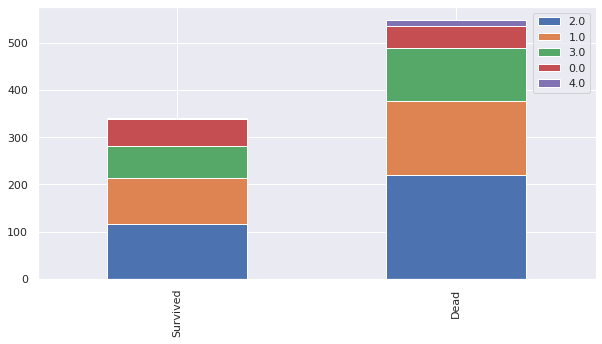

In [32]:
bar_chart('Age')

### 4.5 Embarked

<AxesSubplot:>

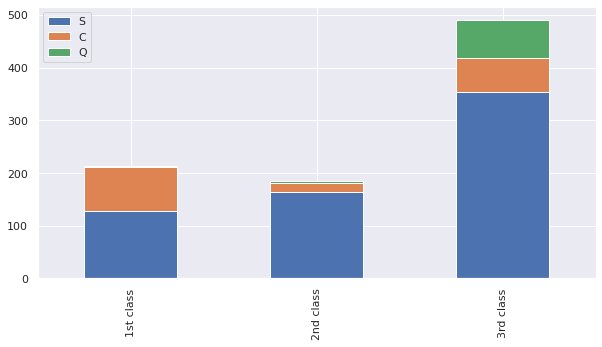

In [33]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["1st class", "2nd class", "3rd class"]
df.plot(kind='bar', stacked=True, figsize=(10, 5))

A라는 도시가 잘 사는 도시고 B라는 도시는 상대적으로 잘 살지 못하는 도시라면, 1등급 죄석은 A라는 도시의 사람들이 더 많이 탔을 가능성이 많음.

'S'가 모든 클래스의 50퍼센트 이상임. -> 만일 Embark 정보가 없는 경우 S로 채워넣어도 무방

In [34]:
# Embark가 NaN이라면 S로 채워넣음
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [36]:
# 텍스트를 숫자로 바꾸어주는 작업
embarked_mapping = { "S": 0, "C": 1, "Q": 2 }

for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

### 4.6 Fare
티켓 가격은 Pclass과 연관이 있음 -> 각 Pclass의 가격의 중간값을 Fare의 NaN자리에 넣어줄 것임

In [37]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

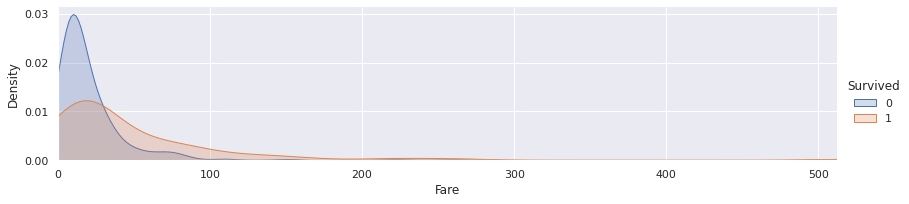

In [38]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

싼 티켓은 많은 사람이 죽었고, 비싼 티켓은 상대적으로 덜 죽었음

In [39]:
# 가격를 구간별로 새로운 인덱스로 설정
for dataset in train_test_data:
  dataset.loc[(dataset['Fare'] <= 17), 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
  dataset.loc[(dataset['Fare'] > 100), 'Fare'] = 3

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### 4.7 Cabin
첫 번째 알파벳만 추출하여 Pclass과 연관하여 판단할 것임

In [41]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [42]:
for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].str[:1]   # 앞의 한 글자만 판단할 것임

<AxesSubplot:>

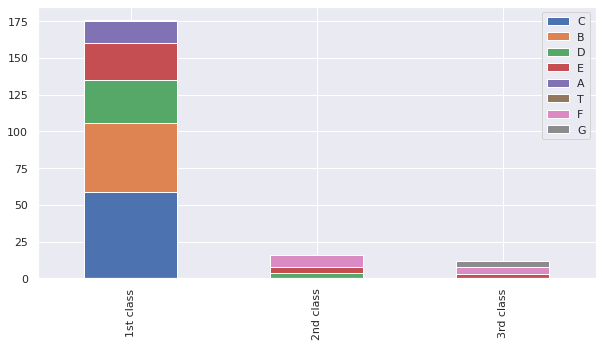

In [43]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["1st class", "2nd class", "3rd class"]
df.plot(kind='bar', stacked=True, figsize=(10, 5))

A, B, C, D, E는 2등급과 3등급에 없음

In [44]:
cabin_mapping = {
    "A": 0, "B": 0.4, "C": 0.8,
    "D": 1.2, "E": 1.6, "F": 2,
    "G": 2.4, "T": 2.8
}
for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

feature scaling -> 각 카테고리 별로 가중치 계산했을 때 해당 카테고리가 적절한 가중치가 되도록 값을 줌

In [45]:
# 중앙값으로 채워줌
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

### 4.8 FamilySize
SibSp, Parch 항목이 있지만 합쳐서 FamilySize 하나의 항목으로 생각

In [46]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

(0.0, 11.0)

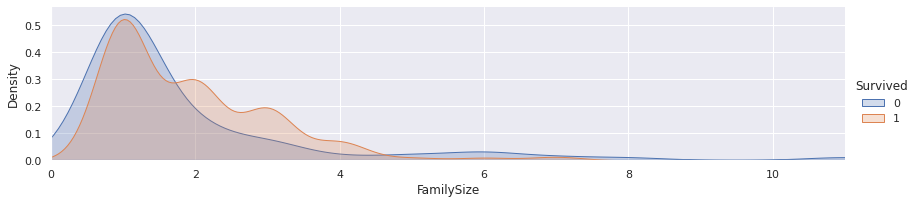

In [47]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

plt.xlim(0)

In [48]:
family_mapping = {
    1: 0, 2: 0.4, 3: 0.8,
    4: 1.2, 5: 1.6, 6: 2,
    7: 2.4, 8: 2.8, 9: 3.2,
    10: 3.6, 11: 4
}
for dataset in train_test_data:
  dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [50]:
# 필요하지 않은 features 제거
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

train = train.drop(['PassengerId'], axis=1)

In [51]:
train_data = train.drop(['Survived'], axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [52]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


feature vector 완성함(값들을 전부 숫자로 변경함), 이제 본격적인 데이터 분석을 실시할 것임
> 전처리가 시간이 많이 걸리고 어쩌면 더 중요하다는 것을 깨달음. 왜냐하면 이 과정에서 나의 주관적인 판단으로 어떤 데이터는 고려 대상이 아니라고 판단되어 feature에서 제거되고, 어떤 데이터는 중요한 요소라고 판단되기 때문임. 그리고 특히 feature scaling 과정도 매우 중요하다고 판단됨. 이 과정도 오직 데이터 분석을 하는 사람의 주관에 따라 수치가 정히지므로 이때 정해진 숫자가 데이터 분석에 꽤나 많은 영향을 끼칠 수 있을거라 생각됨. 그리고 각 데이터 별로 상관관계를 파악해 내는 것도 중요한 부분이라고 생각됨.

## 5. Modeling

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


## 6.2 Cross Validation(K-fold)

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## 6.2.1 kNN

In [56]:
clf = KNeighborsClassifier(n_neighbors=13)    # 13개의 이웃
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.7752809  0.82022472 0.83146067 0.85393258 0.83146067
 0.82022472 0.80898876 0.83146067 0.80898876]


In [57]:
# kNN score
round(np.mean(score) * 100, 2)

81.93

## 6.2.2 Decision Tree

In [58]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.82022472 0.76404494 0.7752809  0.87640449 0.75280899
 0.83146067 0.82022472 0.74157303 0.78651685]


In [59]:
# Decision Tree score
round(np.mean(score) * 100, 2)

79.35

## Random Forest

In [60]:
clf = RandomForestClassifier(n_estimators=13)    # 13그루의 나무
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.80898876 0.7752809  0.79775281 0.88764045 0.79775281
 0.82022472 0.80898876 0.76404494 0.80898876]


In [61]:
# Random Forest score
round(np.mean(score) * 100, 2)

80.47

## 6.2.4 Naive Bayes

In [62]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [63]:
round(np.mean(score) * 100, 2)

78.78

## 6.2.5 SVM

In [64]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [65]:
round(np.mean(score) * 100, 2)

83.5

SVM 이 제일 높게 나왔음 -> SVM 사용할 것임

## 7. Testing

In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin        418 non-null    float64
 6   Embarked     418 non-null    int64  
 7   Title        417 non-null    float64
 8   FamilySize   418 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 29.5 KB


확인해보니 train set의 Title에 대해 매핑을 다 했다고 생각했는데 test set을 확인해보니 매핑 안되있는 항목이 하나 있었음(414) -> 이 NaN 값을 3으로 지정해줄 것임

In [67]:
test.Title.value_counts

<bound method IndexOpsMixin.value_counts of 0      0.0
1      2.0
2      0.0
3      0.0
4      2.0
      ... 
413    0.0
414    NaN
415    0.0
416    0.0
417    3.0
Name: Title, Length: 418, dtype: float64>

In [77]:
test['Title'] = test['Title'].fillna(3)

In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin        418 non-null    float64
 6   Embarked     418 non-null    int64  
 7   Title        418 non-null    float64
 8   FamilySize   418 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 29.5 KB


In [80]:
clf = SVC()
clf.fit(train_data, target)   # SVM classfier에 train_data 삽입

test_data = test.drop('PassengerId', axis=1).copy()   # PassengerId는 필요가 없음
prediction = clf.predict(test_data)

작동이 안됨
> ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

값에 NaN은 처리했으므로 float 값 때문에 그러는거 같은데 해결방안이... 가 아니라 title에 NaN 값이 있었네

In [81]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   Cabin       418 non-null    float64
 5   Embarked    418 non-null    int64  
 6   Title       418 non-null    float64
 7   FamilySize  418 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.2 KB


에러 발생 이유 발견: Title에 NaN 값이 있다

In [84]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'], 
    'Survived': prediction
})

submission.to_csv("submission.csv", index=False)

In [85]:
submission = pd.read_csv("submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


시행착오: train set에 문자열(Name)에 대해서 다 커버를 했다고 생각했지만 test set안의 하나의 데이터가 숫자로 매핑이 되지 않아 숫자로 매핑하는 과정에서 NaN으로 기록이 되어있었음. 그래서 처음에는 예측을 했을때 NaN값으로 인해 오류가 났음. 이후 fillna함수를 이용하여 값을 3으로 처리하였음. 다시 생각해보니 처음 train 했을 때 Name의 Mr, Mis, Mrs을 제외한 값은 다 3으로 처리가 되었으니 이름 하나하나를 3으로 지정하지 말고 (해당 세개를 제외한 14개, test set에서는 15개) 해당 세개를 우선 매핑하고, 그럴 경우 해당 되지 않는 나머지 문자들은 모두 NaN으로 매핑 될 것이므로 이때 fillna함수를 사용하여 나머지 데이터들을 3으로 처리하면 위와 같은 상황이 발생하지 않을 것 같음.